# Meaning of mathematical model used in curve fitting, in terms of speed of decay rate decrease

We visualize what are the decay rates associated with given different mathematical functions used in curve fitting of biochar decomposition timeseries.

In [11]:
import biocharStability as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

fp = '../biocharStability/database/biochar_incubation_database_2022-03-22_live.xlsx'
data = bs.load_data(filepath=fp)

Data loaded, with 2809 rows


Parametrisation of a single, double and infinite exponential pool model, obtained for a given observation in the dataset (ID_obs = 68, fits in fille all_libs_allfits_p0.xlsx).

In [76]:
TH = np.arange(0, 1000*365, 1) # days

# SINGLE
k = 2.93/1e5 # %/day eq to MRT of 100 years
BC_1P = bs.singleExp(TH, k)
k_BC_1P = - np.diff(BC_1P)
k_BC_1P_calc = k*bs.singleExp(TH, k) # yields the same as above (np.diff or direct calculation of apparent decay rate)

# DOUBLE
k1 = 0.988088
k2 = 1.65/1e5
c1 = 100-99.66696
BC_2P = bs.doubleExp(TH, k1, k2, c1)
k_BC_2P = - np.diff(BC_2P)

# POWER
c0 = 100
b = -8.05426
m = -0.583
BC_PW = bs.powerModel(TH, c0, b, m)
k_BC_PW = - np.diff(BC_PW)

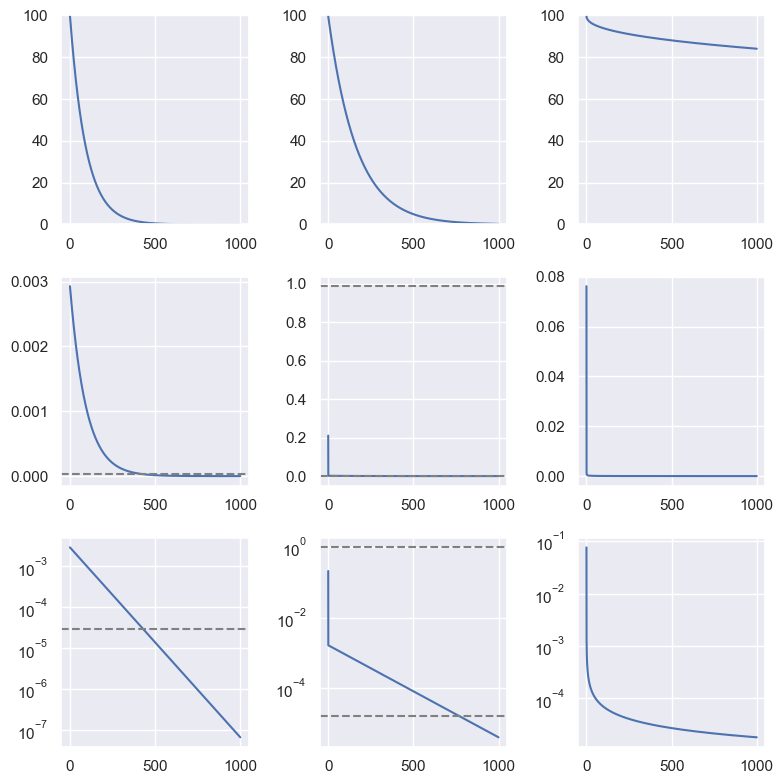

In [77]:
fig, ax = plt.subplots(3,3, figsize=(8,8))

# SINGLE EXPONENTIONAL
i=(0,0)
ax[i].plot(TH/365, BC_1P)
ax[i].set_ylim(0,100)

i=(1,0)
ax[i].plot( (TH/365)[1:], k_BC_1P)
ax[i].axhline(k, ls='--', c='grey', label='k')


i=(2,0)
ax[i].plot( (TH/365)[1:], k_BC_1P)
ax[i].axhline(k, ls='--', c='grey', label='k')
ax[i].set_yscale('log')

# DOUBLE EXPONENTIAL
i=(0,1)
ax[i].plot(TH/365, BC_2P)
ax[i].set_ylim(0,100)

i=(1,1)
ax[i].plot( (TH/365)[1:], k_BC_2P)
ax[i].axhline(k1, ls='--', c='grey', label='k1')
ax[i].axhline(k2, ls='--', c='grey', label='k2')

i=(2,1)
ax[i].plot( (TH/365)[1:], k_BC_2P)
ax[i].axhline(k1, ls='--', c='grey', label='k1')
ax[i].axhline(k2, ls='--', c='grey',label='k2')
ax[i].set_yscale('log')


# INFINITE EXPONENTIAL
i=(0,2)
ax[i].plot(TH/365, BC_PW)
ax[i].set_ylim(0,100)

i=(1,2)
ax[i].plot( (TH/365)[1:], k_BC_PW)
#ax[i].axhline(k1, ls='--', c='grey', label='k1')
#ax[i].axhline(k2, ls='--', c='grey', label='k2')

i=(2,2)
ax[i].plot( (TH/365)[1:], k_BC_PW)
#ax[i].axhline(k1, ls='--', c='grey', label='k1')
#ax[i].axhline(k2, ls='--', c='grey',label='k2')
ax[i].set_yscale('log')

fig.tight_layout()

Parametrisation of a single, double and infinite exponential pool model, obtained for a given observation in the dataset (ID_obs = 40 (Kuzyakov), fits in fille all_libs_allfits_p0.xlsx).

In [109]:
x, y = bs.select_timeseries(40, data, 'k_bc_rel0', 100)
x, yrem = bs.select_timeseries(40, data, 'C_bc_rem_rel', 100)

TH = np.arange(0, 1000*365, 1) # days

# SINGLE
k = 2.43/1e5 # %/day eq to MRT of 100 years
BC_1P = bs.singleExp(TH, k)
k_BC_1P = - np.diff(BC_1P)
k_BC_1P_calc = k*bs.singleExp(TH, k) # yields the same as above (np.diff or direct calculation of apparent decay rate)

# DOUBLE
k1 = 0.107931
k2 = 1.09/1e5
c1 = 2.504478
BC_2P = bs.doubleExp(TH, k1, k2, c1)
k_BC_2P = - np.diff(BC_2P)

# POWER
c0 = 99.29711
b = -6.75879
m = -0.68669
BC_PW = bs.powerModel(TH, c0, b, m)
k_BC_PW = - np.diff(BC_PW)

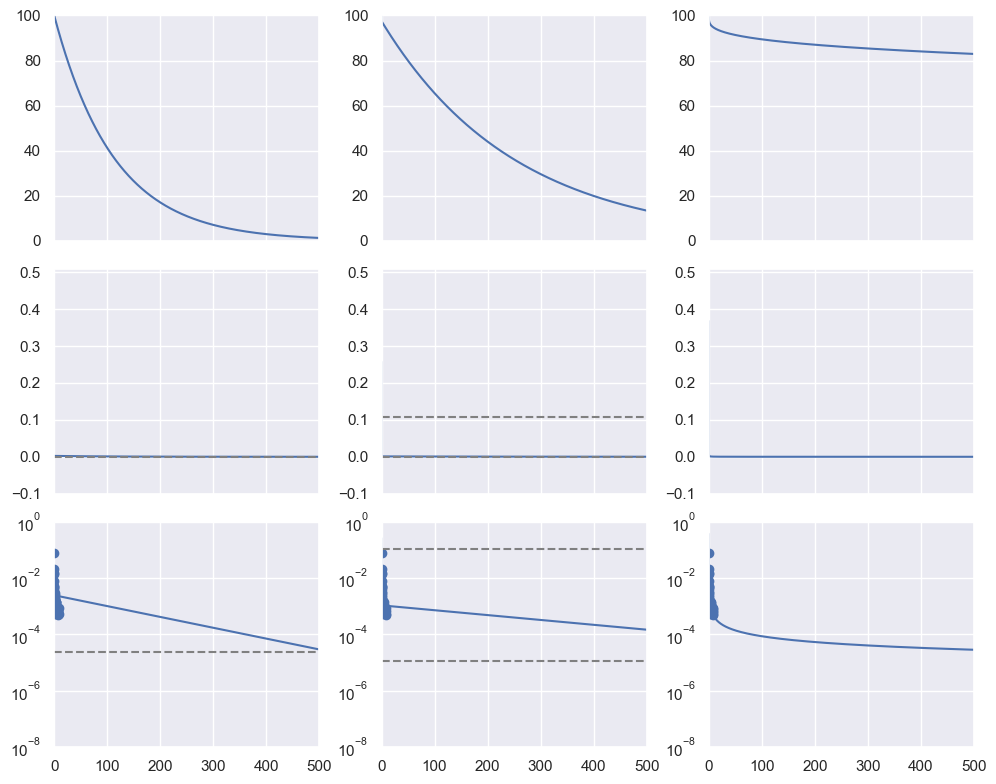

In [112]:
fig, ax = plt.subplots(3,3, figsize=(10,8), sharex=True)
x_th = 500

# SINGLE EXPONENTIONAL
i=(0,0)
ax[i].plot(TH/365, BC_1P)
ax[i].set_ylim(0,100)
ax[i].set_xlim(0,x_th)

i=(1,0)
ax[i].plot( (TH/365)[1:], k_BC_1P)
ax[i].axhline(k, ls='--', c='grey', label='k')
ax[i].set_ylim(-0.1, 0.51)


i=(2,0)
ax[i].scatter(x/365, y)
ax[i].plot( (TH/365)[1:], k_BC_1P)
ax[i].axhline(k, ls='--', c='grey', label='k')
ax[i].set_ylim(1e-8,1)
ax[i].set_yscale('log')

# DOUBLE EXPONENTIAL
i=(0,1)
ax[i].plot(TH/365, BC_2P)
ax[i].set_ylim(0,100)

i=(1,1)
ax[i].plot( (TH/365)[1:], k_BC_2P)
ax[i].axhline(k1, ls='--', c='grey', label='k1')
ax[i].axhline(k2, ls='--', c='grey', label='k2')
ax[i].set_ylim(-0.1, 0.51)

i=(2,1)
ax[i].scatter(x/365, y)
ax[i].plot( (TH/365)[1:], k_BC_2P)
ax[i].axhline(k1, ls='--', c='grey', label='k1')
ax[i].axhline(k2, ls='--', c='grey',label='k2')
ax[i].set_ylim(1e-8, 1)
ax[i].set_yscale('log')


# INFINITE EXPONENTIAL
i=(0,2)
ax[i].plot(TH/365, BC_PW)
ax[i].set_ylim(0,100)

i=(1,2)
ax[i].plot( (TH/365)[1:], k_BC_PW)
#ax[i].axhline(k1, ls='--', c='grey', label='k1')
#ax[i].axhline(k2, ls='--', c='grey', label='k2')
ax[i].set_ylim(-0.1, 0.51)

i=(2,2)
ax[i].scatter(x/365, y)
ax[i].plot( (TH/365)[1:], k_BC_PW)
#ax[i].axhline(k1, ls='--', c='grey', label='k1')
#ax[i].axhline(k2, ls='--', c='grey',label='k2')
ax[i].set_ylim(1e-8,1)
ax[i].set_yscale('log')

fig.tight_layout()

In [131]:
x, y = bs.select_timeseries(40, data, 'k_bc_rel0', 100)
x, yrem = bs.select_timeseries(40, data, 'C_bc_rem_rel', 100)

TH = np.arange(0, 1000*365, 1) # days

# SINGLE
k = 2.43/1e5 # %/day eq to MRT of 100 years
BC_1P = bs.singleExp(TH, k)
k_BC_1P = - np.diff(BC_1P)
k_BC_1P_calc = k*bs.singleExp(TH, k) # yields the same as above (np.diff or direct calculation of apparent decay rate)

# DOUBLE
k1 = 0.107931
k2 = 1.09/1e5
c1 = 2.504478
BC_2P = bs.doubleExp(TH, k1, k2, c1)
k_BC_2P = - np.diff(BC_2P)

# POWER
c0 = 99.29711
b = -6.75879
m = -0.68669
BC_PW = bs.powerModel(TH, c0, b, m)
k_BC_PW = - np.diff(BC_PW)

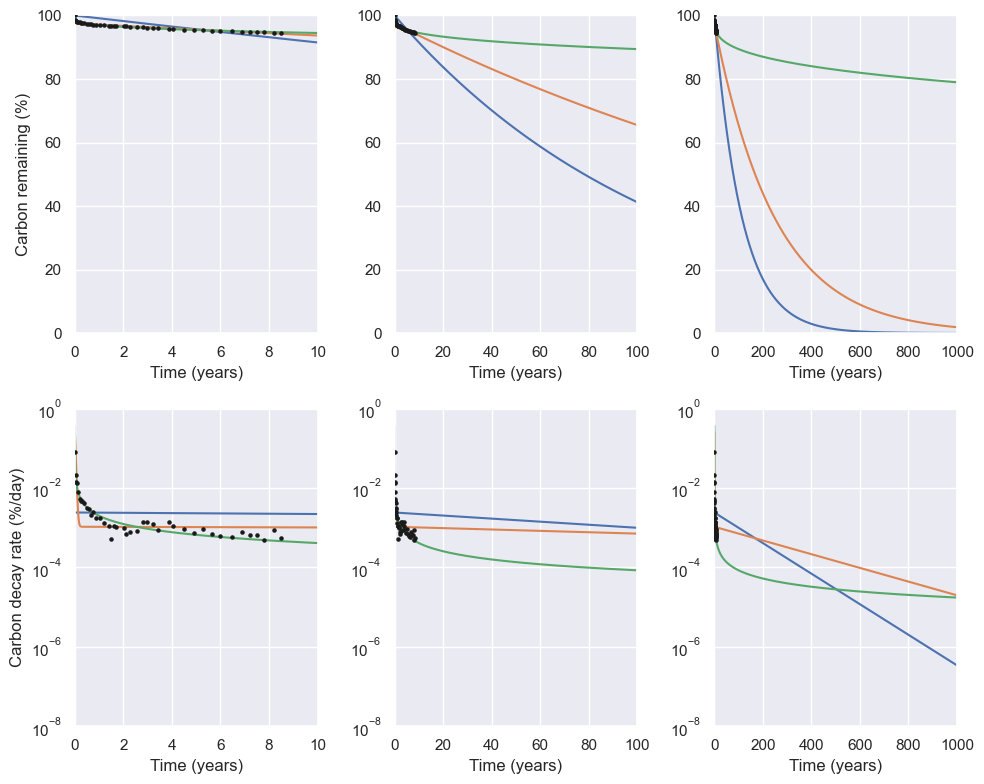

In [132]:
fig, ax = plt.subplots(2,3, figsize=(10,8))

# AT 10 YEARS

i=(0,0)
ax[i].plot(TH/365, BC_1P)
ax[i].plot(TH/365, BC_2P)
ax[i].plot(TH/365, BC_PW)
ax[i].scatter(x/365, yrem, s=5, c='k', zorder=100)

ax[i].set_xlabel('Time (years)')
ax[i].set_ylim(0,100)
ax[i].set_xlim(0,10)
ax[i].set_ylabel('Carbon remaining (%)')

i=(1,0)
ax[i].plot( (TH/365)[1:], k_BC_1P)
ax[i].plot( (TH/365)[1:], k_BC_2P)
ax[i].plot( (TH/365)[1:], k_BC_PW)
ax[i].scatter(x/365, y, s=5, c='k', zorder=100)

ax[i].set_xlabel('Time (years)')
ax[i].set_ylim(1e-8,1)
ax[i].set_xlim(0,10)
ax[i].set_yscale('log')
ax[i].set_ylabel('Carbon decay rate (%/day)')


# AT 100 YEARS 
i=(0,1)
ax[i].plot(TH/365, BC_1P)
ax[i].plot(TH/365, BC_2P)
ax[i].plot(TH/365, BC_PW)
ax[i].scatter(x/365, yrem, s=5, c='k', zorder=100)

ax[i].set_xlabel('Time (years)')
ax[i].set_ylim(0,100)
ax[i].set_xlim(0,100)

i=(1,1)
ax[i].plot( (TH/365)[1:], k_BC_1P)
ax[i].plot( (TH/365)[1:], k_BC_2P)
ax[i].plot( (TH/365)[1:], k_BC_PW)
ax[i].scatter(x/365, y, s=5, c='k', zorder=100)

ax[i].set_xlabel('Time (years)')
ax[i].set_ylim(1e-8, 1)
ax[i].set_xlim(0,100)
ax[i].set_yscale('log')


# AT 1000 YEARS
i=(0,2)
ax[i].plot(TH/365, BC_1P)
ax[i].plot(TH/365, BC_2P)
ax[i].plot(TH/365, BC_PW)
ax[i].scatter(x/365, yrem, s=5, c='k', zorder=100)

ax[i].set_xlabel('Time (years)')
ax[i].set_ylim(0,100)
ax[i].set_xlim(0,1000)

i=(1,2)
ax[i].plot( (TH/365)[1:], k_BC_1P)
ax[i].plot( (TH/365)[1:], k_BC_2P)
ax[i].plot( (TH/365)[1:], k_BC_PW)
ax[i].scatter(x/365, y, s=5, c='k', zorder=100)

ax[i].set_xlabel('Time (years)')
ax[i].set_ylim(1e-8,1)
ax[i].set_xlim(0,1000)
ax[i].set_yscale('log')

fig.tight_layout()


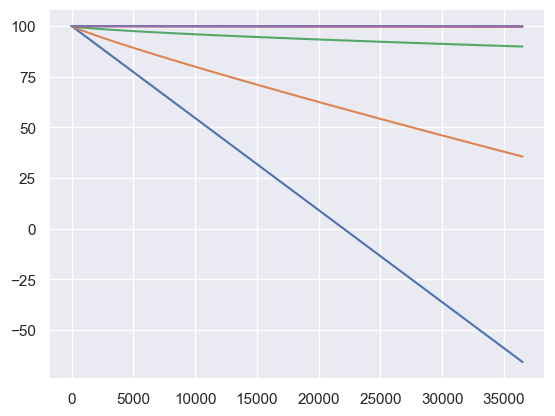

In [10]:
TH = np.arange(0, 365*100, 1)
PW = bs.powerModel(TH, 100, -10, -0.0)
plt.plot(TH, PW)
PW = bs.powerModel(TH, 100, -10, -0.1)
plt.plot(TH, PW)
PW = bs.powerModel(TH, 100, -10, -0.3)
plt.plot(TH, PW)
PW = bs.powerModel(TH, 100, -10, -0.7)
plt.plot(TH, PW)
PW = bs.powerModel(TH, 100, -10, -1.0)
plt.plot(TH, PW)